# import libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

# import dataset

In [52]:
data_set=pd.read_csv('DoctorVisits.csv')

In [53]:
data_set

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no


In [54]:
data_set.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [55]:
data_set.tail()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no
5189,5190,0,male,0.72,0.25,0,0,0,no,no,yes,no,no


In [56]:
data_set.describe()

,Unnamed: 0,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,0.406385,0.583160,1.431985,0.861850,1.217534
std,1498.368279,0.798134,0.204782,0.368907,1.384152,2.887628,2.124266
min,1.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000
25%,1298.250000,0.000000,0.220000,0.250000,0.000000,0.000000,0.000000
50%,2595.500000,0.000000,0.320000,0.550000,1.000000,0.000000,0.000000
75%,3892.750000,0.000000,0.620000,0.900000,2.000000,0.000000,2.000000
max,5190.000000,9.000000,0.720000,1.500000,5.000000,14.000000,12.000000


In [57]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [58]:
data_set.shape

(5190, 13)

In [59]:
data_set.columns

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

# Data cleaning

In [60]:
data_set.rename(columns={'Unnamed: 0':'id'},inplace=True)

In [61]:
data_set.columns

Index(['id', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

In [62]:
data_set.drop('id',inplace=True,axis=1)

In [63]:
data_set.drop_duplicates(subset=['visits','gender','age','income','illness','reduced','health','private','freepoor','freerepat','nchronic','lchronic'],inplace=True)

In [64]:
data_set

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
5177,0,male,0.72,0.55,0,0,0,no,no,yes,no,no
5180,0,male,0.19,0.25,1,0,1,no,yes,no,no,no
5184,0,male,0.22,1.50,0,0,0,no,no,no,no,no
5187,0,female,0.37,0.25,1,0,1,no,no,yes,no,no


<Axes: >

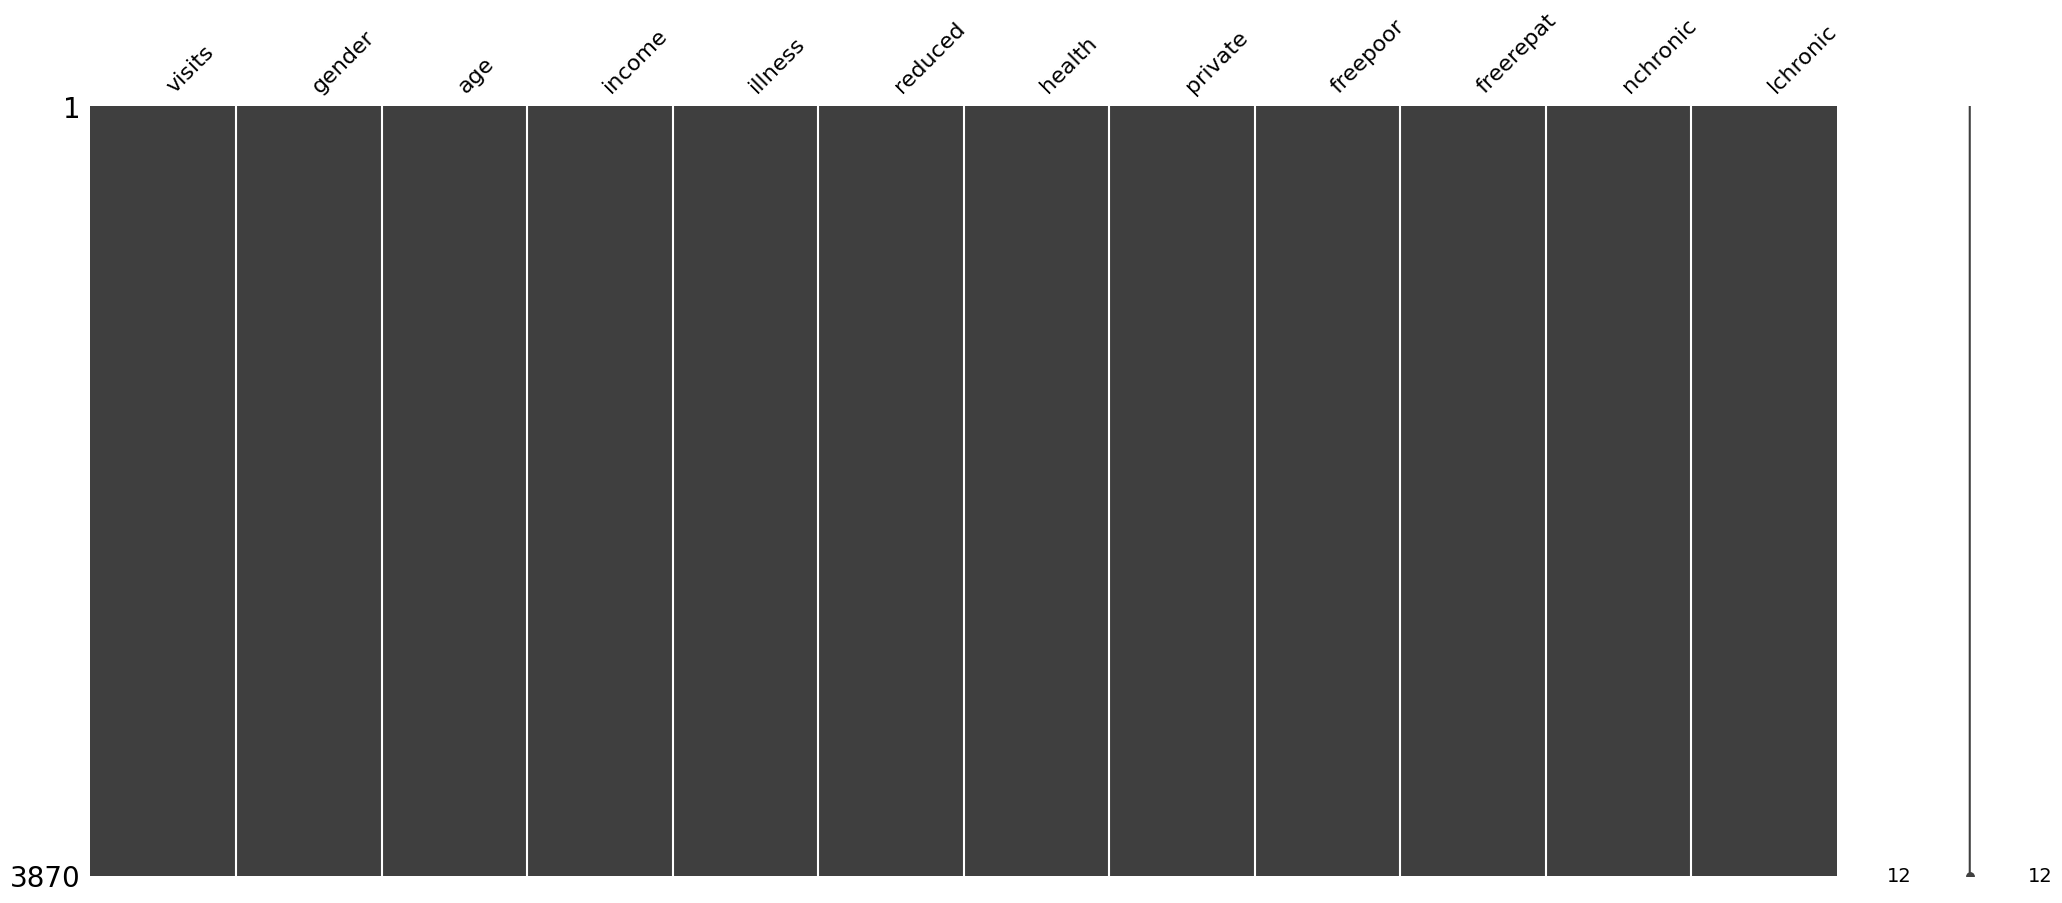

In [65]:
mn.matrix(data_set)

In [67]:
# for null values
pd.isnull(data_set)

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5177,False,False,False,False,False,False,False,False,False,False,False,False
5180,False,False,False,False,False,False,False,False,False,False,False,False
5184,False,False,False,False,False,False,False,False,False,False,False,False
5187,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
data_set['visits'].unique()

array([1, 2, 3, 4, 8, 5, 7, 6, 9, 0])

In [69]:
data_set['gender'].unique()

array(['female', 'male'], dtype=object)

In [70]:
data_set['age'].unique()

array([0.19, 0.22, 0.27, 0.32, 0.37, 0.42, 0.47, 0.52, 0.57, 0.62, 0.67,
       0.72])

In [71]:
data_set['income'].unique()

array([0.55, 0.45, 0.9 , 0.15, 0.35, 0.65, 0.25, 0.  , 0.06, 1.1 , 0.75,
       0.01, 1.3 , 1.5 ])

In [72]:
data_set['income'].replace({0. : 0.0},inplace=True)

In [73]:
data_set['illness'].unique()

array([1, 3, 2, 5, 4, 0])

In [74]:
data_set['reduced'].unique()

array([ 4,  2,  0,  5,  1, 13,  7,  3, 14,  6,  8,  9, 10, 12, 11])

In [75]:
data_set['health'].unique()

array([ 1,  0,  9,  2,  6,  5,  7, 11,  4, 12,  3, 10,  8])

In [76]:
data_set['private'].unique()

array(['yes', 'no'], dtype=object)

In [77]:
data_set['freerepat'].unique()

array(['no', 'yes'], dtype=object)

In [78]:
data_set['freepoor'].unique()

array(['no', 'yes'], dtype=object)

In [79]:
data_set['nchronic'].unique()

array(['no', 'yes'], dtype=object)

In [80]:
data_set['lchronic'].unique()

array(['no', 'yes'], dtype=object)

In [81]:
data_set.dropna()

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
5177,0,male,0.72,0.55,0,0,0,no,no,yes,no,no
5180,0,male,0.19,0.25,1,0,1,no,yes,no,no,no
5184,0,male,0.22,1.50,0,0,0,no,no,no,no,no
5187,0,female,0.37,0.25,1,0,1,no,no,yes,no,no


In [82]:
#there is no any null values
pd.isnull(data_set).sum()

visits       0
gender       0
age          0
income       0
illness      0
reduced      0
health       0
private      0
freepoor     0
freerepat    0
nchronic     0
lchronic     0
dtype: int64

In [83]:
data_set.columns

Index(['visits', 'gender', 'age', 'income', 'illness', 'reduced', 'health',
       'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

In [84]:
data_set.groupby(['gender','reduced']).mean()

<ipython-input-84-460c08862cbb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_set.groupby(['gender','reduced']).mean()


visits       age    income   illness    health
gender reduced                                                  
female 0        0.288741  0.451634  0.502996  1.648305  1.475182
       1        0.400000  0.325684  0.542105  2.242105  1.610526
       2        0.672727  0.391455  0.560182  2.236364  1.781818
       3        1.333333  0.403111  0.516000  2.733333  1.733333
       4        0.851852  0.458889  0.466667  2.222222  2.074074
       5        1.444444  0.401667  0.614444  2.222222  2.500000
       6        1.363636  0.426364  0.622727  2.363636  1.363636
       7        1.384615  0.436154  0.473462  2.653846  2.230769
       8        1.090909  0.471818  0.404545  2.181818  4.000000
       9        0.500000  0.570000  0.825000  3.000000  1.000000
       10       2.142857  0.512857  0.421429  2.571429  2.000000
       12       2.000000  0.720000  0.250000  3.500000  5.500000
       13       4.000000  0.720000  0.300000  4.500000  3.500000
       14       1.547826  0.550261  0.429130  2.547826  4.130435
male   0        0.190572  0.368653  0.678296  1.373737  1.283502
       1        0.312500  0.288250  0.682000  1.750000  1.287500
       2        0.471698  0.343585  0.653019  2.358491  1.547170
       3        0.724138  0.334138  0.741379  2.137931  1.689655
       4        0.722222  0.309444  0.869444  2.055556  2.000000
       5        1.136364  0.331818  0.570455  2.272727  2.818182
       6        0.833333  0.340000  0.591667  2.500000  2.000000
       7        0.750000  0.314167  0.655000  2.583333  4.333333
       8        1.333333  0.365000  0.833333  2.666667  2.000000
       9        2.200000  0.310000  0.392000  2.400000  2.000000
       10       1.800000  0.480000  0.590000  2.600000  4.600000
       11       5.000000  0.320000  1.000000  1.500000  0.500000
       12       2.000000  0.370000  0.515000  1.500000  1.000000
       13       4.000000  0.510000  0.350000  3.333333  2.333333
       14       1.555556  0.476806  0.598611  2.375000  3.527778

# Structured variables

In [85]:
x=data_set.iloc[:,:-1].values

In [86]:
print(x)

[[1 'female' 0.19 ... 'no' 'no' 'no']
 [1 'female' 0.19 ... 'no' 'no' 'no']
 [1 'male' 0.19 ... 'no' 'no' 'no']
 ...
 [0 'male' 0.22 ... 'no' 'no' 'no']
 [0 'female' 0.37 ... 'no' 'yes' 'no']
 [0 'female' 0.52 ... 'no' 'no' 'no']]


In [87]:
y=data_set.iloc[:,11:12].values

In [88]:
print(y)

[['no']
 ['no']
 ['no']
 ...
 ['no']
 ['no']
 ['no']]


# Encoded Categories

In [89]:
data_set.dtypes

visits         int64
gender        object
age          float64
income       float64
illness        int64
reduced        int64
health         int64
private       object
freepoor      object
freerepat     object
nchronic      object
lchronic      object
dtype: object

In [90]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder_x=LabelEncoder()
x[:,0]=label_encoder_x.fit_transform(x[:,0])
onehot_encoder_y=OneHotEncoder()
x=onehot_encoder_y.fit_transform(x).toarray()
print(x)

[[0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]]


In [91]:
label_encoder_y=LabelEncoder()
y=label_encoder_y.fit_transform(y)
print(y)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# splitting dataset into training and testing

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [93]:
print(x_train)

[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]]


In [94]:
print(x_test)

[[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]]


# Figure scaling

In [95]:
from sklearn.preprocessing import StandardScaler
ss_x=StandardScaler()
x_train=ss_x.fit_transform(x_train)
x_test=ss_x.transform(x_test)
print(x_train)

[[ 0.57777652 -0.47050038 -0.21055421 ... -0.49896158  0.86798506
  -0.86798506]
 [ 0.57777652 -0.47050038 -0.21055421 ...  2.00416234  0.86798506
  -0.86798506]
 [-1.73077301  2.12539681 -0.21055421 ...  2.00416234 -1.15209357
   1.15209357]
 ...
 [ 0.57777652 -0.47050038 -0.21055421 ... -0.49896158  0.86798506
  -0.86798506]
 [ 0.57777652 -0.47050038 -0.21055421 ... -0.49896158  0.86798506
  -0.86798506]
 [ 0.57777652 -0.47050038 -0.21055421 ... -0.49896158  0.86798506
  -0.86798506]]


In [96]:
print(x_test)

[[-1.73077301  2.12539681 -0.21055421 ... -0.49896158 -1.15209357
   1.15209357]
 [ 0.57777652 -0.47050038 -0.21055421 ... -0.49896158 -1.15209357
   1.15209357]
 [ 0.57777652 -0.47050038 -0.21055421 ... -0.49896158  0.86798506
  -0.86798506]
 ...
 [-1.73077301  2.12539681 -0.21055421 ... -0.49896158  0.86798506
  -0.86798506]
 [ 0.57777652 -0.47050038 -0.21055421 ... -0.49896158 -1.15209357
   1.15209357]
 [ 0.57777652 -0.47050038 -0.21055421 ... -0.49896158  0.86798506
  -0.86798506]]


<ipython-input-97-0e30056f020d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_set.corr(),cbar=True,annot=True,cmap='Blues')


<Axes: >

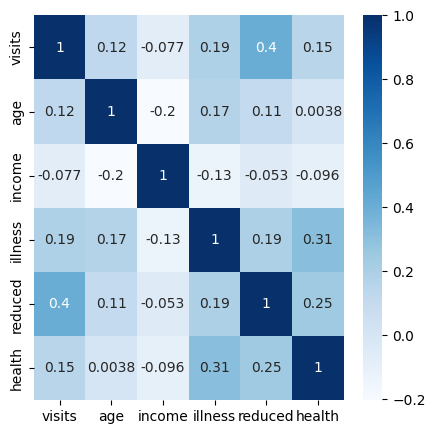

In [97]:
plt.figure(figsize=(5,5))
sns.heatmap(data_set.corr(),cbar=True,annot=True,cmap='Blues')

In [98]:
data_set.groupby(['gender','illness']).mean()

<ipython-input-98-10159fe34247>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_set.groupby(['gender','illness']).mean()


visits       age    income   reduced    health
gender illness                                                  
female 0        0.150617  0.438494  0.546519  0.071605  0.716049
       1        0.441083  0.412850  0.530080  1.417197  1.391720
       2        0.503356  0.440179  0.521141  1.205817  1.727069
       3        0.498258  0.466690  0.451254  1.445993  2.236934
       4        0.668831  0.506299  0.424610  2.090909  2.824675
       5        0.823129  0.564014  0.385850  2.904762  3.265306
male   0        0.107527  0.364731  0.709591  0.107527  0.722581
       1        0.319039  0.345197  0.694185  1.075472  1.152659
       2        0.379679  0.355294  0.664385  1.181818  1.823529
       3        0.368687  0.386313  0.619040  1.595960  1.621212
       4        0.519231  0.413269  0.629519  1.759615  3.134615
       5        0.910256  0.487308  0.570256  2.782051  3.538462

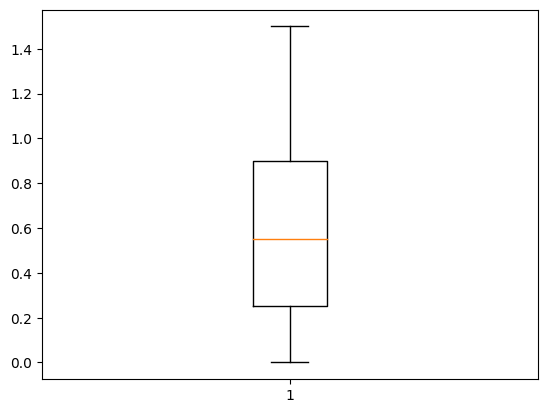

In [99]:
x=list(data_set.income)
plt.boxplot(x)
plt.show()

describe() method returns description of the data in the data_set  (ex: count,mean,std etc)

In [100]:
data_set.describe()

,visits,age,income,illness,reduced,health
count,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,0.389147,0.410762,0.582550,1.670543,1.151680,1.577778
std,0.899433,0.200034,0.377685,1.421045,3.286601,2.330537
min,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.220000,0.250000,1.000000,0.000000,0.000000
50%,0.000000,0.320000,0.550000,1.000000,0.000000,1.000000
75%,1.000000,0.620000,0.900000,2.750000,0.000000,2.000000
max,9.000000,0.720000,1.500000,5.000000,14.000000,12.000000


used describe() for specific columns

In [101]:
data_set[['age','visits','income']].describe()

,age,visits,income
count,3870.000000,3870.000000,3870.000000
mean,0.410762,0.389147,0.582550
std,0.200034,0.899433,0.377685
min,0.190000,0.000000,0.000000
25%,0.220000,0.000000,0.250000
50%,0.320000,0.000000,0.550000
75%,0.620000,1.000000,0.900000
max,0.720000,9.000000,1.500000


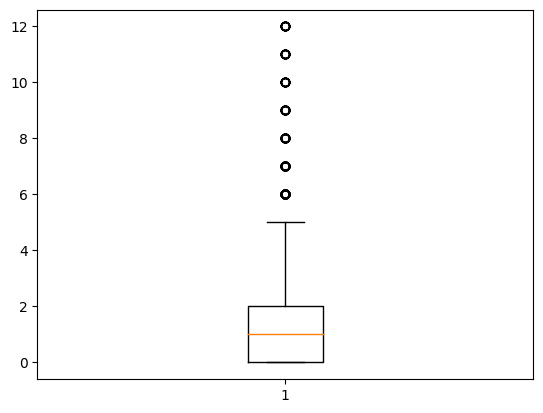

In [102]:
x=list(data_set.health)
plt.boxplot(x)
plt.show()

In [103]:
data_set.groupby(['gender','visits']).mean()

<ipython-input-103-f870f7e44f35>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_set.groupby(['gender','visits']).mean()


age    income   illness    reduced     health
gender visits                                                    
female 0       0.431416  0.521375  1.622680   0.711340   1.509278
       1       0.486696  0.470670  2.151786   1.816964   1.870536
       2       0.506460  0.424956  2.513274   3.283186   2.637168
       3       0.433077  0.381538  2.076923   4.076923   2.846154
       4       0.466923  0.339231  2.230769   5.846154   3.153846
       5       0.324000  0.660000  1.600000   8.400000   3.400000
       6       0.647778  0.305556  2.888889  12.444444   4.444444
       7       0.550000  0.415000  3.200000   9.800000   2.500000
       8       0.405000  0.875000  1.500000  10.500000   0.500000
male   0       0.354856  0.677193  1.378246   0.511579   1.292632
       1       0.414891  0.688007  1.898551   2.108696   1.909420
       2       0.380000  0.599500  2.383333   3.416667   2.000000
       3       0.450588  0.685294  2.647059   5.176471   3.058824
       4       0.364545  0.622727  2.090909   7.272727   2.090909
       5       0.432500  0.825000  1.000000   8.500000   2.000000
       6       0.503333  0.666667  3.666667  13.000000   2.666667
       7       0.470000  0.125000  2.000000  13.500000   3.500000
       8       0.586667  0.170000  2.666667  12.333333   5.333333
       9       0.620000  0.250000  5.000000  14.000000  10.000000

In [104]:
data_set.columns

Index(['visits', 'gender', 'age', 'income', 'illness', 'reduced', 'health',
       'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

# Gender

<Axes: xlabel='gender', ylabel='count'>

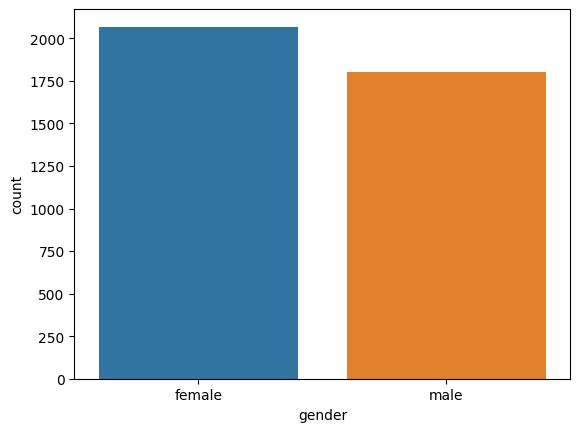

In [105]:
sns.countplot(x='gender',data=data_set)

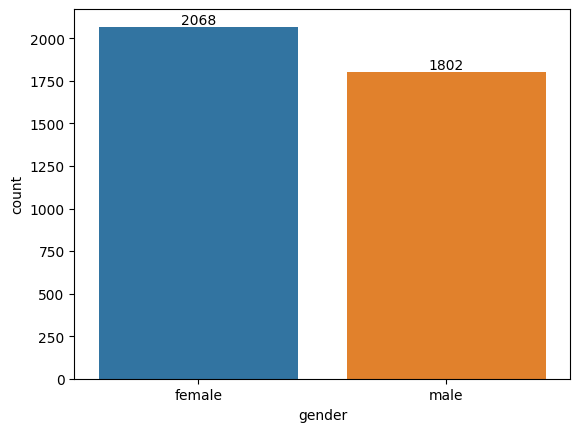

In [106]:
ax =sns.countplot(x='gender',data =data_set)
for bars in ax.containers:
  ax.bar_label(bars)

In [107]:
data_set.groupby(['gender'],as_index=False)['income'].sum().sort_values(by='income',ascending=False)

,gender,income
1,male,1215.67
0,female,1038.80


<Axes: xlabel='gender', ylabel='income'>

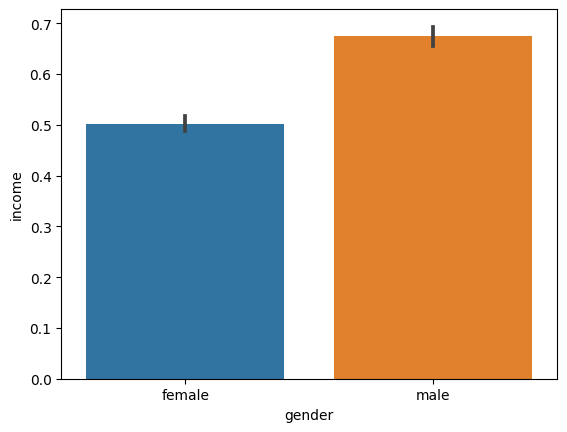

In [108]:
income_gen =data_set.groupby(['gender'],as_index=False)['income'].sum().sort_values(by='income',ascending=False)

sns.barplot(x='gender',y='income',data=data_set)

from the above graph male earn more income rather than female

# Age

In [109]:
data_set.columns

Index(['visits', 'gender', 'age', 'income', 'illness', 'reduced', 'health',
       'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

<Axes: xlabel='age', ylabel='count'>

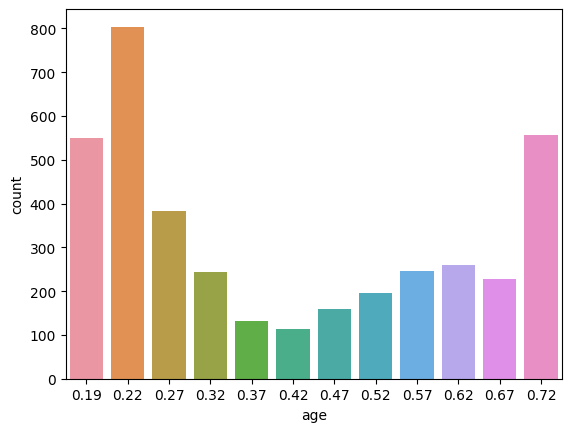

In [110]:
sns.countplot(x='age',data=data_set)

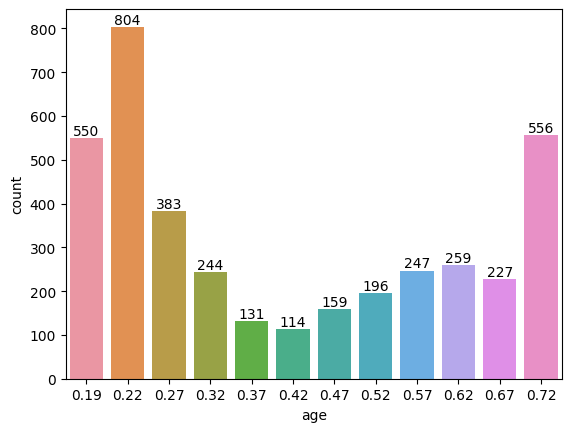

In [111]:
ax =sns.countplot(x='age',data =data_set)
for bars in ax.containers:
  ax.bar_label(bars)

In [112]:
data_set.groupby(['age'],as_index=False)['income'].sum().sort_values(by='income',ascending=False)

,age,income
1,0.22,499.37
2,0.27,314.81
0,0.19,225.17
3,0.32,222.37
11,0.72,207.54
8,0.57,130.93
7,0.52,125.44
9,0.62,124.14
4,0.37,113.92
6,0.47,113.14


<Axes: xlabel='age', ylabel='income'>

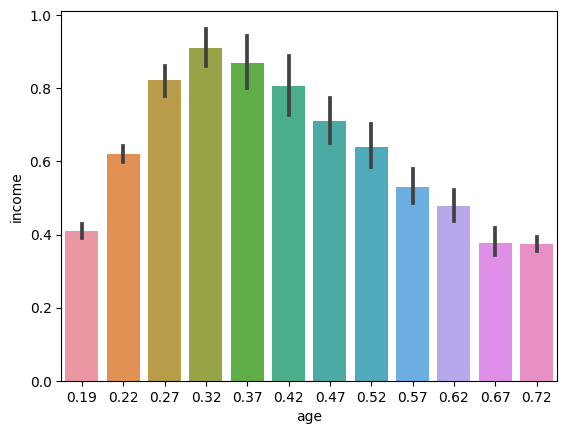

In [113]:
income_age =data_set.groupby(['age'],as_index=False)['income'].sum().sort_values(by='income',ascending=False)

sns.barplot(x='age',y='income',data=data_set)

# Visits

In [114]:
data_set.columns

Index(['visits', 'gender', 'age', 'income', 'illness', 'reduced', 'health',
       'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

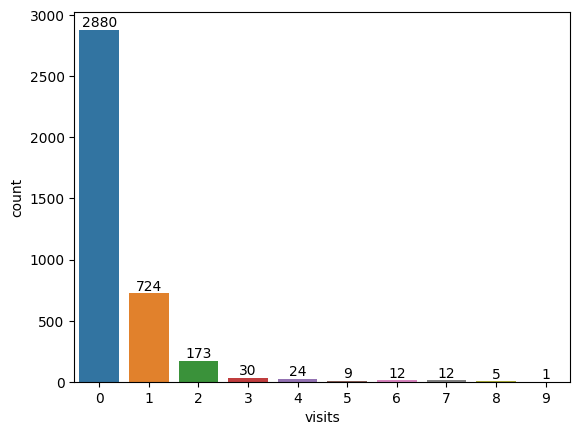

In [115]:
ax =sns.countplot(x='visits',data =data_set)
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='visits', ylabel='income'>

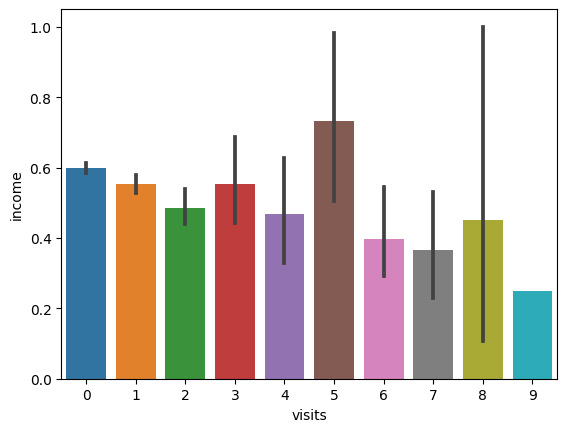

In [116]:
income_age =data_set.groupby(['visits'],as_index=False)['income'].sum().sort_values(by='income',ascending=False)

sns.barplot(x='visits',y='income',data=data_set)

<Axes: xlabel='visits', ylabel='income'>

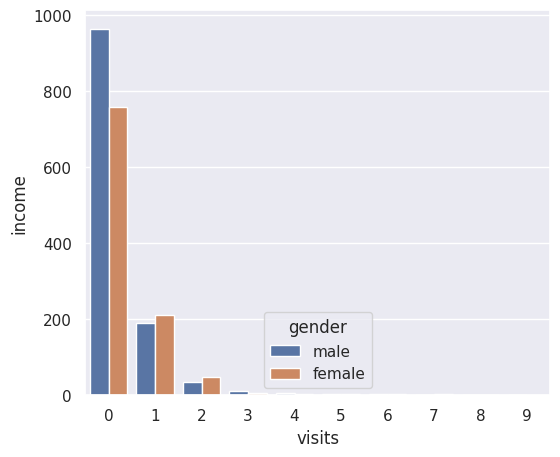

In [117]:
income_visits =data_set.groupby(['visits','gender'],as_index=False)['income'].sum().sort_values(by='income',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=income_visits,x='visits',y='income',hue='gender')

<Axes: >

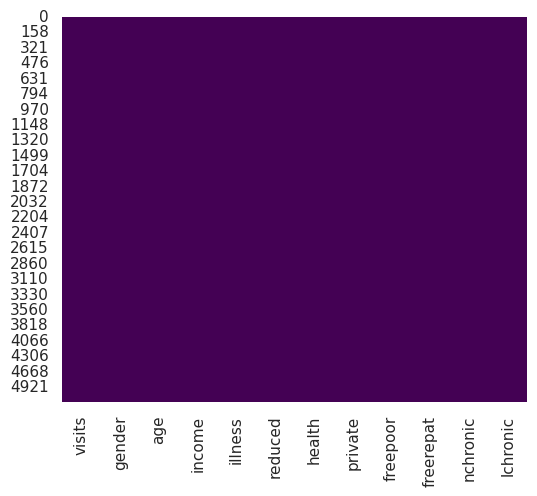

In [118]:
sns.heatmap(data_set.isnull(),cbar=False,cmap='viridis')